# Lab 9: Pre-Processing with Scikit-Learn and Pandas

The objective of this notebook is to learn about **pre-processing** with the **Scikit-Learn** and **Pandas** libraries. Then, train a simple binary classifier on the pre-processed dataset.

In this lab, we will train a binary classification model that predicts which **passengers survived** the **Titanic shipwreck** <a href="https://www.kaggle.com/c/titanic" >link</a>.

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this notebook, you are asked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). For now we just focus on the preprocessing part, but you can come back here later after the laboratory on classification

You can find a detailed **tutorial** <a href="https://datasciencewithchris.com/kaggle-titanic-data-cleaning-and-preprocessing/" >here</a>.

## Outline

- [1. Load Dataset](#1)
- [2.  Data pre-processing](#2)
- [3. Model training](#3) (Following the workshop on classification)


First, run the following cell to import some useful libraries to complete this Lab. If not already done, you must install them in your virtual environment

In [2]:
import pandas as pd

pd.options.display.max_columns= 50
pd.options.display.max_rows= None

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

from sklearn.impute import SimpleImputer

<a id='1'></a>
## 1. Load dataset

Firstly, you will load the **Titanic** dataset used in this lab into a DataFrame `df`. 

**Scikit-Learn** comes with built-in datasets for the **Titanic dataset**. The next cell loads the titanic dataset from Scikit-Learn and stores it in a Pandas DataFrame.

In [3]:
df, y = fetch_openml('titanic', version=1, as_frame=True, parser='auto', return_X_y=True)
df["survived"] = y

In [4]:
df.to_csv("lab6_data.csv")

Run the next cell to look at the first 5 rows of the dataset.

In [5]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [6]:
print("Number of samples:", len(df))

Number of samples: 1309


In [7]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived'],
      dtype='object')

The dataset is composed of 1309 samples. Each row contains information on each passenger. Specifically, the dataset contains the following attributes:

- **pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **name**: Passenger name
- **sex**: Passenger sex
- **age**: Passenger age
- **sibsp**: Number of Siblings/Spouses Aboard
- **parch**: Number of Parents/Children Aboard
- **ticket**: Ticket Number
- **fare**: Passenger Fare
- **cabin**: Cabin
- **embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- **boat**: Lifeboat (if survived)
- **body**: Body number (if did not survive and body was recovered). It could be another target.
- **home.dest**: Destination
- **survival** (target): Survival (0 = No; 1 = Yes)

Note that **boat** and **body** must be removed from input features because provide information about the target variable (i.e., they have values only if target is survived).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [9]:
df.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<a id='2'></a>
## 2. Data pre-processing

Firstly, you will perform the pre-processing of the dataset.


### 2.1 Train and Test splitting with Stratification

In [10]:
df["survived"].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

The dataset is a slightly **imbalance**.

In [11]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


#### Exercise 2.6.1

Extract the input features in `X` and the target values in `y`.

In [12]:
#### START CODE HERE (~2 lines) ####

X = df.loc[:, "pclass":"home.dest"]
y = df["survived"]

#### END CODE HERE ####

In [13]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Exercise 2.1.2

Split the dataset into **train** and **test**. In this case, the dataset is **imbalance**. Therefore, it is recommended to split using stratification (i.e., the class label distribution will be preserved during the splitting).

Split with 80% for training and 20% for validation. Shuffle the dataset before splitting.

In [19]:
#### START CODE HERE (~1 line) ####

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=None)

#### END CODE HERE ####

In [21]:
print(f"Number of training examples: {len(X_train)}")
print(f"Number of testing examples: {len(X_test)}")

Number of training examples: 1047
Number of testing examples: 262


### 2.2 Handling missing values

#### Exercise 2.2.1
Count the number of **null values** in training and test, and store them in the variables `nan_count_train` and `nan_count_test`.

In [24]:
#### START CODE HERE (~2 lines) ####

nan_count_train = X_train.isna().sum()
nan_count_test = X_test.isna().sum()

#### END CODE HERE ####

In [25]:
print("Train")
print(nan_count_train)

Train
pclass         0
name           0
sex            0
age          207
sibsp          0
parch          0
ticket         0
fare           1
cabin        813
embarked       1
boat         672
body         948
home.dest    453
dtype: int64


In [26]:
print("Test")
print(nan_count_test)

Test
pclass         0
name           0
sex            0
age           56
sibsp          0
parch          0
ticket         0
fare           0
cabin        201
embarked       1
boat         151
body         240
home.dest    111
dtype: int64


Sometimes, the **missing values** are not in the *nan* format.

The next cell prints the format of *nan* values.

In [27]:
print('Data types of missing values')
for col in X_train.columns[X_train.isnull().any()]:
    print(col, X_train[col][X_train[col].isnull()].values[0])

Data types of missing values
age nan
fare nan
cabin nan
embarked nan
boat nan
body nan
home.dest nan


In this case, all *nan* values are in the *nan* format.

#### Exercise 2.2.2

Fill **null values** in the column `age` with the **mean** of the column `age` in the training and test set. Please compute the mean only on the training!

In [29]:
print(f'Number of null values in Train before pre-processing: {X_train.age.isnull().sum()}/{len(X_train)}')
print(f'Number of null values in Test before pre-processing: {X_test.age.isnull().sum()}/{len(X_test)}')

#### START CODE HERE (~2 lines) ####

X_train['age'].fillna(X_train['age'].mean(), inplace=True)
X_test['age'].fillna(X_test['age'].mean(), inplace=True)
None

#### END CODE HERE ####

print(f'Number of null values in Train after pre-processing: {X_train.age.isnull().sum()}/{len(X_train)}')
print(f'Number of null values in Test after pre-processing: {X_test.age.isnull().sum()}/{len(X_test)}')

Number of null values in Train before pre-processing: 207/1047
Number of null values in Test before pre-processing: 56/262
Number of null values in Train after pre-processing: 0/1047
Number of null values in Test after pre-processing: 0/262


#### Exercise 2.2.3

Fill **null values** in the column `fare` with the **median** of the column `fare` in the training and test set. Please compute the median only on the training!

In [39]:
print(f'Number of null values in Train before pre-processing: {X_train.fare.isnull().sum()}/{len(X_train)}')
print(f'Number of null values in Test before pre-processing: {X_test.fare.isnull().sum()}/{len(X_test)}')

#### START CODE HERE (~2 lines) ####

X_train['fare'].fillna(X_train['fare'].median(), inplace=True)
X_test['fare'].fillna(X_test['fare'].median(), inplace=True)
None

#### END CODE HERE ####

print(f'Number of null values in Train after pre-processing: {X_train.fare.isnull().sum()}/{len(X_train)}')
print(f'Number of null values in Test after pre-processing: {X_test.fare.isnull().sum()}/{len(X_test)}')

Number of null values in Train before pre-processing: 0/1047
Number of null values in Test before pre-processing: 0/262
Number of null values in Train after pre-processing: 0/1047
Number of null values in Test after pre-processing: 0/262


#### Exercise 2.2.4

Fill **null values** in the column `embarked` with the **most frequent value** of the column `embarked`. Please compute the most frequent only on the training!

In [41]:
print(f'Number of null values in Train before pre-processing: {X_train.embarked.isnull().sum()}/{len(X_train)}')
print(f'Number of null values in Test before pre-processing: {X_test.embarked.isnull().sum()}/{len(X_test)}')

#### START CODE HERE (~3 lines) ####

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train['embarked'] = imp.fit_transform(X_train[['embarked']]).ravel()
X_test['embarked'] = imp.transform(X_test[['embarked']]).ravel()

#### END CODE HERE ####

print(f'Number of null values in Train after pre-processing: {X_train.embarked.isnull().sum()}/{len(X_train)}')
print(f'Number of null values in Test after pre-processing: {X_test.embarked.isnull().sum()}/{len(X_test)}')

Number of null values in Train before pre-processing: 1/1047
Number of null values in Test before pre-processing: 1/262
Number of null values in Train after pre-processing: 0/1047
Number of null values in Test after pre-processing: 0/262


### 2.3 Features selection

#### Exercise 2.3.1
Remove columns *cabin*, *body*, *boat*, and *home.dest* from the train and test sets because they contain info about the target variable (i.e., the model could "cheat" predicting the target label based on the info in these attributes).

In [42]:
#### START CODE HERE (~2 lines) ####

X_train = X_train.drop(columns=["cabin", "body", "boat", "home.dest"])
X_test = X_test.drop(columns=["cabin", "body", "boat", "home.dest"])

#### END CODE HERE ####

X_train.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
772,3,"Dika, Mr. Mirko",male,17.000000,0,0,349232,7.8958,S
543,2,"Reeves, Mr. David",male,36.000000,0,0,C.A. 17248,10.5000,S
289,1,"Taussig, Miss. Ruth",female,18.000000,0,2,110413,79.6500,S
10,1,"Astor, Col. John Jacob",male,47.000000,1,0,PC 17757,227.5250,C
147,1,"Harrington, Mr. Charles H",male,29.532738,0,0,113796,42.4000,S


#### Exercise 2.3.2

Remove other columns that you think are useless features in predicting which people were more likely to survive.

In [43]:
#### START CODE HERE (~2 lines) ####

X_train = X_train.drop(columns=["name", "ticket"])
X_test = X_test.drop(columns=["name", "ticket"])

#### END CODE HERE ####

X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
772,3,male,17.000000,0,0,7.8958,S
543,2,male,36.000000,0,0,10.5000,S
289,1,female,18.000000,0,2,79.6500,S
10,1,male,47.000000,1,0,227.5250,C
147,1,male,29.532738,0,0,42.4000,S


The next cell plots the **correlation heatmap** using `Seaborn` and `df.corr()`. You will probably need to install `Seaborn` using the command `pip install seaborn`, and then restart your kernel.

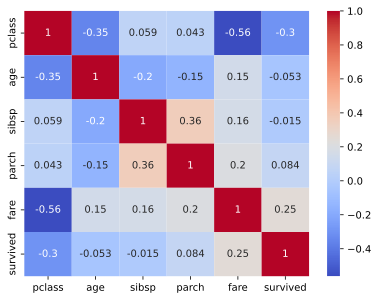

In [47]:
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

df_show = pd.concat([X_train[['pclass', 'age', 'sibsp', 'parch', 'fare']], y_train], axis = 1)

g = sns.heatmap(df_show.corr(),
                annot=True, 
                cmap = "coolwarm")

### 2.4 Features engineering (optional)

#### Exercise 2.4.1

If you want, you can create new columns here from the ones available.

In [48]:
#### START CODE HERE ####

#### END CODE HERE ####

X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
772,3,male,17.000000,0,0,7.8958,S
543,2,male,36.000000,0,0,10.5000,S
289,1,female,18.000000,0,2,79.6500,S
10,1,male,47.000000,1,0,227.5250,C
147,1,male,29.532738,0,0,42.4000,S


### 2.5 Discretization

The next cell performs the **discretization** of the age column with **fixed-intervals**. 
You can learn more about **discretization** <a href="https://trainindata.medium.com/variable-discretization-in-machine-learning-7b09009915c2" >here</a>.

In [49]:
age_category = ['Child (0-14]', 'Young (14-24]', 'Adults (24-50]', 'Senior (50+]']
 
X_train['age_disc']=pd.cut(x=X_train['age'], bins=[0,14,24,50,100],labels=age_category)
X_train = X_train.drop(columns=['age']) # Remove the old age column

X_test['age_disc']=pd.cut(x=X_test['age'], bins=[0,14,24,50,100],labels=age_category)
X_test = X_test.drop(columns=['age']) # Remove the old age column

In [50]:
X_train.head()

,pclass,sex,sibsp,parch,fare,embarked,age_disc
772,3,male,0,0,7.8958,S,Young (14-24]
543,2,male,0,0,10.5000,S,Adults (24-50]
289,1,female,0,2,79.6500,S,Young (14-24]
10,1,male,1,0,227.5250,C,Adults (24-50]
147,1,male,0,0,42.4000,S,Adults (24-50]


In [51]:
X_test.head()

,pclass,sex,sibsp,parch,fare,embarked,age_disc
1148,3,male,0,0,7.1250,S,Adults (24-50]
1049,3,male,1,1,15.7417,C,Young (14-24]
982,3,male,0,0,7.8958,S,Adults (24-50]
808,3,male,0,0,8.0500,S,Adults (24-50]
1195,3,male,0,0,7.7500,Q,Adults (24-50]


### 2.7 One-hot encoding

The following cells perform the **one-hot encoding** of the categorical features using the `OneHotEncoder` of the **Scikit-Learn** library. You can also use a similar approach using the `get_dummies` function of **Pandas**.

You can learn the differences between `OneHotEncoder` and `get_dummies` <a href="https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/" >here</a>.

When building the `OneHotEncoder` object, the `handle_unknown` parameter is set to `'ignore'`. 


In [52]:
X_train.head()

,pclass,sex,sibsp,parch,fare,embarked,age_disc
772,3,male,0,0,7.8958,S,Young (14-24]
543,2,male,0,0,10.5000,S,Adults (24-50]
289,1,female,0,2,79.6500,S,Young (14-24]
10,1,male,1,0,227.5250,C,Adults (24-50]
147,1,male,0,0,42.4000,S,Adults (24-50]


In [53]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore') 

In [54]:
categorical_columns = ['sex', 'embarked']

In [55]:
ohe.fit(X_train[categorical_columns]) # Fit on training data

temp_df = pd.DataFrame(data=ohe.transform(X_train[categorical_columns]).toarray(), 
                       columns=ohe.get_feature_names_out()) # Create a new DataFrame with only the one-hot encoded cols

X_train.drop(columns=categorical_columns, axis=1, inplace=True) # Remove the old categorical columns from the original data
X_train = pd.concat([X_train.reset_index(drop=True), temp_df], axis=1)

X_train.head()

,pclass,sibsp,parch,fare,age_disc,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,0,0,7.8958,Young (14-24],0.0,1.0,0.0,0.0,1.0
1,2,0,0,10.5000,Adults (24-50],0.0,1.0,0.0,0.0,1.0
2,1,0,2,79.6500,Young (14-24],1.0,0.0,0.0,0.0,1.0
3,1,1,0,227.5250,Adults (24-50],0.0,1.0,1.0,0.0,0.0
4,1,0,0,42.4000,Adults (24-50],0.0,1.0,0.0,0.0,1.0


In [56]:
temp_df = pd.DataFrame(data=ohe.transform(X_test[categorical_columns]).toarray(), 
                       columns=ohe.get_feature_names_out()) # Not fit on test data!

X_test.drop(columns=categorical_columns, axis=1, inplace=True)
X_test = pd.concat([X_test.reset_index(drop=True), temp_df], axis=1)

X_test.head()

,pclass,sibsp,parch,fare,age_disc,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,0,0,7.1250,Adults (24-50],0.0,1.0,0.0,0.0,1.0
1,3,1,1,15.7417,Young (14-24],0.0,1.0,1.0,0.0,0.0
2,3,0,0,7.8958,Adults (24-50],0.0,1.0,0.0,0.0,1.0
3,3,0,0,8.0500,Adults (24-50],0.0,1.0,0.0,0.0,1.0
4,3,0,0,7.7500,Adults (24-50],0.0,1.0,0.0,1.0,0.0


### 2.7 Ordinal Encoding

When the categorical feature are ordinal we can use ordinal Encoding. Since the order among the categories is important, encoding should reflect the sequence.

In [57]:
age_category

['Child (0-14]', 'Young (14-24]', 'Adults (24-50]', 'Senior (50+]']

In [58]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories=[age_category]) # Should be a list becuause you can specify the categories for multiple columns


ord_enc.fit(X_train.loc[:, ["age_disc"]]) # Fit on training data



,categories,"[['Child (0-14]', 'Young (14-24]', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [59]:
X_train["age_disc_enc"] = ord_enc.transform(X_train.loc[:, ["age_disc"]])

X_train.head()

,pclass,sibsp,parch,fare,age_disc,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,3,0,0,7.8958,Young (14-24],0.0,1.0,0.0,0.0,1.0,1.0
1,2,0,0,10.5000,Adults (24-50],0.0,1.0,0.0,0.0,1.0,2.0
2,1,0,2,79.6500,Young (14-24],1.0,0.0,0.0,0.0,1.0,1.0
3,1,1,0,227.5250,Adults (24-50],0.0,1.0,1.0,0.0,0.0,2.0
4,1,0,0,42.4000,Adults (24-50],0.0,1.0,0.0,0.0,1.0,2.0


In [60]:
X_train.drop(columns=["age_disc"], axis=1, inplace=True)

X_train.head()

,pclass,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,3,0,0,7.8958,0.0,1.0,0.0,0.0,1.0,1.0
1,2,0,0,10.5000,0.0,1.0,0.0,0.0,1.0,2.0
2,1,0,2,79.6500,1.0,0.0,0.0,0.0,1.0,1.0
3,1,1,0,227.5250,0.0,1.0,1.0,0.0,0.0,2.0
4,1,0,0,42.4000,0.0,1.0,0.0,0.0,1.0,2.0


In [61]:
X_test["age_disc_enc"] = ord_enc.transform(X_test.loc[:, ["age_disc"]])
X_test.drop(columns=["age_disc"], axis=1, inplace=True)

X_test.head()

,pclass,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,3,0,0,7.1250,0.0,1.0,0.0,0.0,1.0,2.0
1,3,1,1,15.7417,0.0,1.0,1.0,0.0,0.0,1.0
2,3,0,0,7.8958,0.0,1.0,0.0,0.0,1.0,2.0
3,3,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,2.0
4,3,0,0,7.7500,0.0,1.0,0.0,1.0,0.0,2.0


### 2.8 Normalization/Standardization

#### Exercise 2.8.1 

Perform **Min-Max** normalization of the *numerical features*. Remember to **fit** on the training and not on the test. Note that `age_disc_enc` in this case is categorical but can be normalized too.

In [67]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ["pclass", "sibsp", "parch", "fare", "age_disc_enc"]

#### START CODE HERE (~4 lines) ####

minmax_s = MinMaxScaler()

minmax_s.fit(X_train[numerical_features]) 

X_train[numerical_features] = minmax_s.transform(X_train[numerical_features])
X_test[numerical_features] = minmax_s.fit_transform(X_test[numerical_features])

#### END CODE HERE ####

In [68]:
X_train.head()

,pclass,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,1.0,0.000,0.000000,0.015412,0.0,1.0,0.0,0.0,1.0,0.333333
1,0.5,0.000,0.000000,0.020495,0.0,1.0,0.0,0.0,1.0,0.666667
2,0.0,0.000,0.222222,0.155466,1.0,0.0,0.0,0.0,1.0,0.333333
3,0.0,0.125,0.000000,0.444099,0.0,1.0,1.0,0.0,0.0,0.666667
4,0.0,0.000,0.000000,0.082759,0.0,1.0,0.0,0.0,1.0,0.666667


In [69]:
X_test.head()

,pclass,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,1.0,0.000,0.0,0.013907,0.0,1.0,0.0,0.0,1.0,0.666667
1,1.0,0.125,0.2,0.030726,0.0,1.0,1.0,0.0,0.0,0.333333
2,1.0,0.000,0.0,0.015412,0.0,1.0,0.0,0.0,1.0,0.666667
3,1.0,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,1.0,0.666667
4,1.0,0.000,0.0,0.015127,0.0,1.0,0.0,1.0,0.0,0.666667


### 2.9 Features Reduction

Now we fit PCA on the standardized training data and compute the cumulative explained variance. This tells us how much variance is captured as we increase the number of components.

👉 Plot the cumulative variance curve and add a red line at 90% to guide component selection.

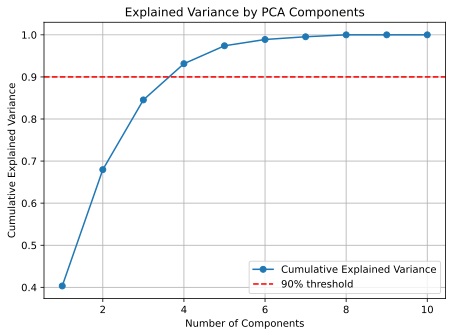

In [76]:

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

#start code

pca = PCA()
X_proj = pca.fit_transform(X_train)

cum_var = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure()
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.9, color='red', linestyle='--', label='90% threshold')

#end code

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Based on the plot above, select the minimum number of components needed to reach a certain threshold (e.g. 90% of the total variance).

👉 Compute the number of components programmatically.

In [77]:
threshold = 0.9

#start code
pca = PCA()
X_proj = pca.fit_transform(X_train)

cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(cum_var >= threshold)[0][0]
#end code

print(f"Number of components to reach {threshold*100:.0f}% variance: {n_components}")


Number of components to reach 90% variance: 3


Now we re-fit PCA using only the selected number of components, and project both training and test data into this reduced space.

👉 Use .fit_transform() on training, and .transform() on test (no refit!).



In [81]:
#start code

pca2 = PCA(n_components=3)
X_train_pca = pca2.fit_transform(X_train)
X_test_pca = pca2.transform(X_test)

#end code

The loadings show how much each original feature contributes to each principal component.

👉 Compute the loadings and visualize the contributions of each feature to PC₁ and PC₂ using a horizontal bar chart.

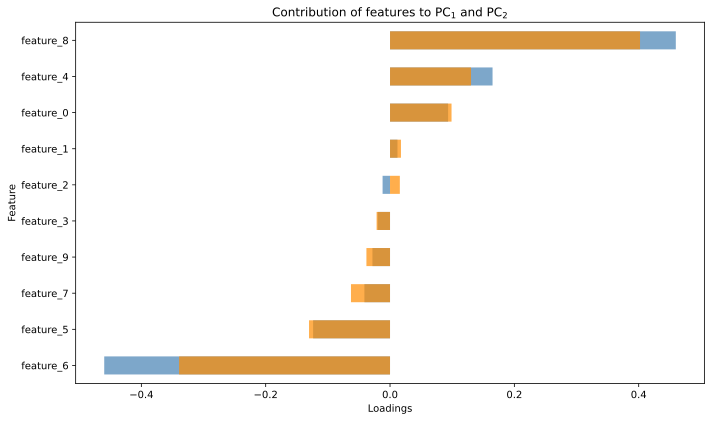

In [82]:
#start code
# as index use: features = [f"feature_{i}" for i in range(X_train.shape[1])]
features = [f"feature_{i}" for i in range(X_train.shape[1])]

# calcoliamo i loadings: componenti * sqrt(varianza spiegata)
loadings = pca2.components_.T * np.sqrt(pca2.explained_variance_)
loading_df = pd.DataFrame(loadings, index=features,
                          columns=[f"PC{i+1}" for i in range(pca2.n_components_)])

plt.figure(figsize=(10,6))

loading_df["PC1"].sort_values().plot.barh(color="steelblue", alpha=0.7, label="PC1")
loading_df["PC2"].sort_values().plot.barh(color="darkorange", alpha=0.7, label="PC2")

#end code

plt.xlabel('Loadings')
plt.ylabel('Feature')
plt.title(f'Contribution of features to PC$_1$ and PC$_2$')
plt.tight_layout()
plt.show()


<a id='3'></a>
## 3. Model Training and Evaluation

Now, you can **train** and **evaluate** a **binary classification** model on the pre-processed dataset. 

### 3.1 Training

### 3.2 Evaluation